## Blend Or Stack
**After watching top kernal many of them are blend and stacking.**

This show how the scores can be imporved by add more models.
Thanks for show this kernals.

ref:
1. https://www.kaggle.com/danmusetoiu/staking-and-stealing-like-a-molecule
2. https://www.kaggle.com/marcelotamashiro/lgb-public-kernels-plus-more-features
3. https://www.kaggle.com/rajwardhanshinde/blend-of-blends
4. https://www.kaggle.com/vaishvik25/blend



## <font color=blue>Vote early and vote often!</font>


## Stat Stack

In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from subprocess import check_output
print(check_output(["ls", "../submits/"]).decode("utf8"))

Blending-24.07
CatBoost_2019-07-19_-1.0257.csv
CatBoost_2019-07-19_-1.0257.csv.gz
Catboost40k2019-07-20_-1.0927.csv.gz
Catboost40k2019-07-20_0.0000.csv.gz
LGB2019-07-19_-1.2248.csv.gz
LGB2019-07-20_-0.7576.csv.gz
LGB2019-07-20_-1.2465.csv
LGB2019-07-24_-1.3617.csv
LGB_2019-07-18_0.0000.csv.zip
LGB_nonCV_[-1.472210519015789].csv
ker-cat-lgb-giba1-2.csv
sub_lgb_model_individual.csv
submission-2.csv
submission-giba-1.csv
superstack_lgb_keras_giba-1.csv
superstack_lgb_keras_giba-[-1.544].csv
workingkit-2019-07-18 22:10:41.465757--0.44098349186482066.csv.zip
workingkit-2019-07-18 22:55:11.738198--0.5312077592520859.csv.zip
workingsubmission-test.csv
workingsubmission-test.csv (4).zip
workingsubmission-test.csv.zip



In [3]:
print(check_output(['ls', '../submits/Blending-24.07/']).decode('utf-8'))

LGB2019-07-24_-1.3617.csv
keras-champs-[-1.084].csv.zip
stack_median.csv.zip
stackers_blend.csv
sub_lgb_model_individual.csv.zip
submission-[-1.587].csv
submission-giba-1.csv
ultrastacking-2.csv
ultrastacking-3.csv
ultrastacking-4.csv
ultrastacking-[-1.577].csv



In [4]:
all_files = [
    '../submits/Blending-24.07/submission-[-1.587].csv',
    "../submits/Blending-24.07/ultrastacking-[-1.577].csv",
    '../submits/LGB_nonCV_[-1.472210519015789].csv',
    '../submits/Blending-24.07/stackers_blend.csv'
]

In [6]:
outs = [pd.read_csv(path, index_col=0) for path in all_files]
concat_sub = pd.concat(outs, axis=1)
cols = list(map(lambda x: "mol" + str(x), range(len(concat_sub.columns))))
concat_sub.columns = cols
concat_sub.reset_index(inplace=True)
concat_sub.head()
ncol = concat_sub.shape[1]

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [7]:
# check correlation
concat_sub.iloc[:,1:ncol].corr()

,mol0,mol1,mol2,mol3
mol0,1.000000,0.999998,0.999926,0.999998
mol1,0.999998,1.000000,0.999926,0.999998
mol2,0.999926,0.999926,1.000000,0.999927
mol3,0.999998,0.999998,0.999927,1.000000


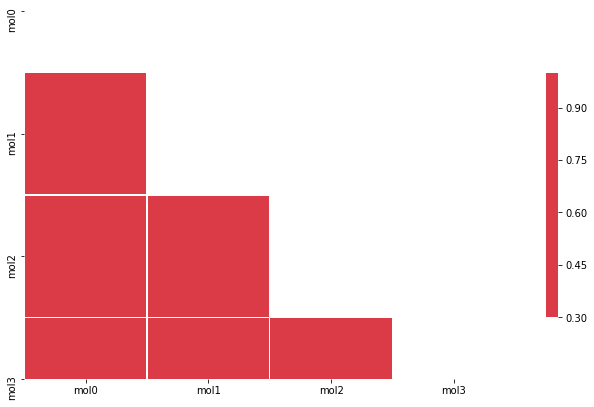

In [8]:
corr = concat_sub.iloc[:,1:7].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [9]:
# get the data fields ready for stacking
concat_sub['m_max'] = concat_sub.iloc[:, 1:ncol].max(axis=1)
concat_sub['m_min'] = concat_sub.iloc[:, 1:ncol].min(axis=1)
concat_sub['m_mean'] = concat_sub.iloc[:, 1:ncol].mean(axis=1)
concat_sub['m_median'] = concat_sub.iloc[:, 1:ncol].median(axis=1)

In [10]:
concat_sub.describe()

,id,mol0,mol1,mol2,mol3,m_max,m_min,m_mean,m_median
count,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06
mean,5.910918e+06,1.588516e+01,1.588532e+01,1.588667e+01,1.588494e+01,1.602317e+01,1.574913e+01,1.588552e+01,1.588489e+01
std,7.232878e+05,3.485694e+01,3.485557e+01,3.486553e+01,3.485588e+01,3.492606e+01,3.479433e+01,3.485798e+01,3.485642e+01
min,4.658147e+06,-3.163485e+01,-3.169338e+01,-3.099046e+01,-3.128573e+01,-2.980706e+01,-3.169338e+01,-3.110526e+01,-3.146029e+01
25%,5.284532e+06,-2.100354e-01,-2.063592e-01,-2.375039e-01,-2.077760e-01,-1.338648e-01,-3.056570e-01,-2.111841e-01,-2.087777e-01
50%,5.910918e+06,2.288803e+00,2.291554e+00,2.290338e+00,2.290830e+00,2.391731e+00,2.186722e+00,2.290311e+00,2.290050e+00
75%,6.537303e+06,7.312868e+00,7.303502e+00,7.357027e+00,7.308802e+00,7.483236e+00,7.174359e+00,7.318124e+00,7.310364e+00
max,7.163688e+06,2.033617e+02,2.030896e+02,2.034109e+02,2.032603e+02,2.034109e+02,2.028780e+02,2.030423e+02,2.031750e+02


In [11]:
cutoff_lo = 0.8
cutoff_hi = 0.2

# Mean Stacking

In [12]:
concat_sub['scalar_coupling_constant'] = concat_sub['m_mean']
concat_sub[['id', 'scalar_coupling_constant']].to_csv('stack_mean.csv', 
                                        index=False, float_format='%.6f')

# Median Stacking

In [13]:
concat_sub['scalar_coupling_constant'] = concat_sub['m_median']
concat_sub[['id', 'scalar_coupling_constant']].to_csv('stack_median.csv', 
                                        index=False, float_format='%.6f')

# Pushout + Median Stacking
>* Pushout strategy is bit aggresive

In [14]:
concat_sub['scalar_coupling_constant'] = np.where(np.all(concat_sub.iloc[:,1:ncol] > cutoff_lo, axis=1), 1, 
                                    np.where(np.all(concat_sub.iloc[:,1:ncol] < cutoff_hi, axis=1),
                                             0, concat_sub['m_median']))
concat_sub[['id', 'scalar_coupling_constant']].to_csv('stack_pushout_median.csv', 
                                        index=False, float_format='%.6f')

# MinMax + Mean Stacking
>* MinMax seems more gentle and it outperforms the previous one

In [15]:
concat_sub['scalar_coupling_constant'] = np.where(np.all(concat_sub.iloc[:,1:ncol] > cutoff_lo, axis=1), 
                                    concat_sub['m_max'], 
                                    np.where(np.all(concat_sub.iloc[:,1:ncol] < cutoff_hi, axis=1),
                                             concat_sub['m_min'], 
                                             concat_sub['m_mean']))
concat_sub[['id', 'scalar_coupling_constant']].to_csv('stack_minmax_mean.csv', 
                                        index=False, float_format='%.6f')

# MinMax + Median Stacking

In [16]:
concat_sub['scalar_coupling_constant'] = np.where(np.all(concat_sub.iloc[:,1:ncol] > cutoff_lo, axis=1), 
                                    concat_sub['m_max'], 
                                    np.where(np.all(concat_sub.iloc[:,1:ncol] < cutoff_hi, axis=1),
                                             concat_sub['m_min'], 
                                             concat_sub['m_median']))
concat_sub[['id', 'scalar_coupling_constant']].to_csv('stack_minmax_median.csv', 
                                        index=False, float_format='%.6f')

## Averaging Ranks

In [17]:
concat_sub['scalar_coupling_constant'] = concat_sub['mol0'].rank(method ='min') + concat_sub['mol1'].rank(method ='min') + concat_sub['mol2'].rank(method ='min') 
concat_sub['scalar_coupling_constant'] = (concat_sub['scalar_coupling_constant']-concat_sub['scalar_coupling_constant'].min())/(concat_sub['scalar_coupling_constant'].max() - concat_sub['scalar_coupling_constant'].min())
concat_sub.describe()
concat_sub[['id', 'scalar_coupling_constant']].to_csv('stack_rank.csv', index=False, float_format='%.8f')

## Blend

In [20]:
sub1=pd.read_csv('../submits/Blending-24.07/stackers_blend.csv')
temp=pd.read_csv('../submits/Blending-24.07/stackers_blend.csv')

In [21]:
sub2=pd.read_csv('./submission.csv')

In [22]:
concat_sub['scalar_coupling_constant'] = 0.60*concat_sub['mol1'] + 0.40*concat_sub['mol2']
concat_sub[['id', 'scalar_coupling_constant']].to_csv('s3.csv', index=False, float_format='%.8f')

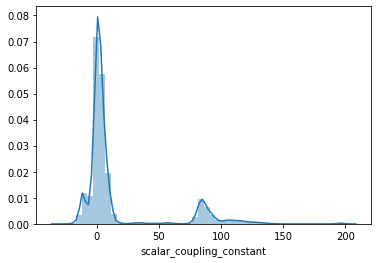

In [23]:
sns.distplot(concat_sub['scalar_coupling_constant'])

In [24]:
temp['scalar_coupling_constant'] = 0.7*sub1['scalar_coupling_constant'] + 0.3*concat_sub['scalar_coupling_constant']
temp.to_csv('submission2.csv', index=False )

In [27]:
temp['scalar_coupling_constant'] = 0.7*sub2['scalar_coupling_constant'] + 0.25*sub1['scalar_coupling_constant'] + 0.05*concat_sub.scalar_coupling_constant
temp.to_csv('submission4.csv', index=False )

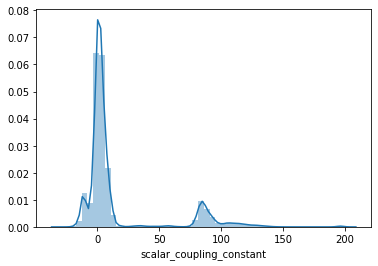

In [28]:
sns.distplot(temp['scalar_coupling_constant'])

submission4.csv gives best score.[ BLEND WINS ]
## <font color=blue>Vote early and vote often!</font>
